In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
import os
import numpy as np
import func
import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib
from params import train_csv_path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define image and batch size
img_height = 256 
img_width = 256
batch_size = 64

# Load and Compile the model
model = tf.keras.models.load_model('./instance/model.h5')

sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.95, decay=0.0004)

model.compile(
    optimizer=sgd, 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

# Create the Generator
test_data_gen = ImageDataGenerator(preprocessing_function=None,
    rescale=1./255)

# Read the positive test samples.
test_generator = test_data_gen.flow_from_directory(
                  directory = r"./instance/test/",
                  target_size=(img_width, img_height), color_mode='grayscale', shuffle=True,
                  batch_size=batch_size, class_mode="categorical")

# print('\n# Evaluate on test data')
# results = model.evaluate(test_generator)
# print('test loss, test acc:', results)

Found 39900 images belonging to 3 classes.



It tooks 131 seconds

columns are predictions, index are ground truth



,Canon Ixus70,Nikon D200,Olympus mju-1050SW
Canon Ixus70,1499,14,5
Nikon D200,5,1558,4
Olympus mju-1050SW,1,3,3311


The mean of the confidence is: 



,Canon Ixus70,Nikon D200,Olympus mju-1050SW
Canon Ixus70,0.995852,0.830226,0.712932
Nikon D200,0.803355,0.991193,0.872416
Olympus mju-1050SW,0.631426,0.585218,0.997383


The standard deviation of the confidence is: 



,Canon Ixus70,Nikon D200,Olympus mju-1050SW
Canon Ixus70,0.001014,0.027106,0.047953
Nikon D200,0.030664,0.001755,0.011113
Olympus mju-1050SW,0.000000,0.003872,0.000464


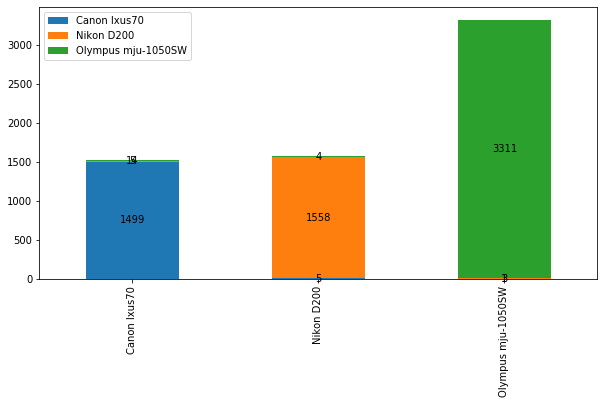

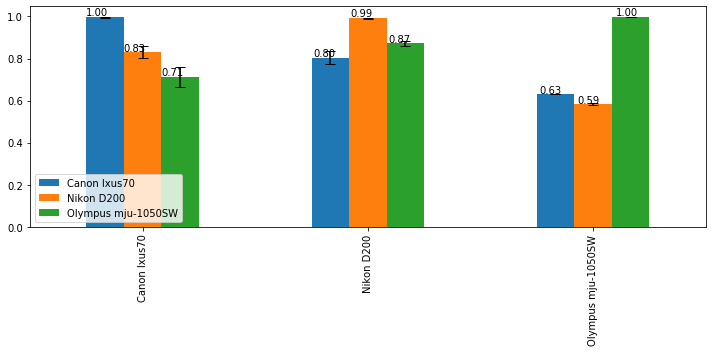

In [5]:
train_db = pd.read_csv(train_csv_path)
model_list = np.unique(train_db['brand_model']) 
model_list = [m.replace("_", " ") for m in model_list]
# generate a histogram, which for every unseen models, how many imgs are classified.
hist, conf, pred_labels, real_labels = func.evaluate(model_list, test_generator, model, index=model_list, 
                                                     columns=model_list, num_batch=100, tex=True)

# for all the images' real label is a certain camera, for example Canon_Ixus70, 
# how does these images are classified ? The magnitude of the histogram indicate how
# sure is the model classified the image as one camera(show by color)
tex = True
df_mean, df_error = func.mean_error(conf, pred_labels, real_labels,
                                    real_model=model_list, pred_model=model_list)
if tex:
    ax = df_mean.plot.bar(yerr=df_error, capsize=5, figsize=(10, 5))
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() * 1.008, p.get_height() * 1.008))
    tikzplotlib.save("test_conf.tex")
    plt.tight_layout()
    
else:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
    df_mean.plot.bar(yerr=df_error, ax=axes[0,0], capsize=4)
    graph = {0:axes[0,1], 1:axes[1,0], 2:axes[1, 1]}
    func.plot_conf(conf, pred_labels, real_labels, graph, real_model=model_list, pred_model=model_list)
    
plt.tight_layout()

Found 3800 images belonging to 3 classes.

It tooks 8 seconds

columns are predictions, index are ground truth



,Canon Ixus70,Nikon D200,Olympus mju-1050SW
Canon Ixus70,798,1,1
Nikon D200,4,1399,3
Olympus mju-1050SW,0,0,994


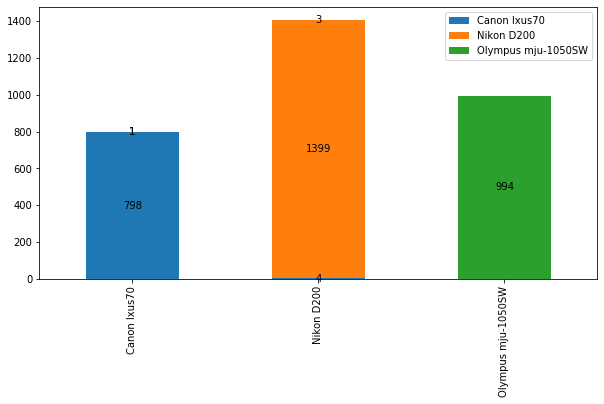

In [9]:
# Read the positive test samples.
test_generator = test_data_gen.flow_from_directory(
                  directory = r"./instance/train/test/",
                  target_size=(img_width, img_height), color_mode='grayscale', shuffle=True,
                  batch_size=batch_size, class_mode="categorical")

hist, conf, pred_labels, real_labels = func.evaluate(model_list, test_generator, model, index=model_list, 
                                                     columns=model_list, num_batch=50, tex=True)

The mean of the confidence is: 



,Canon Ixus70,Nikon D200,Olympus mju-1050SW
Canon Ixus70,0.996708,0.717297,0.616902
Nikon D200,0.822762,0.997336,0.825356
Olympus mju-1050SW,0.000000,0.000000,0.997247


The standard deviation of the confidence is: 



,Canon Ixus70,Nikon D200,Olympus mju-1050SW
Canon Ixus70,0.000930,0.000000,0.000000
Nikon D200,0.022916,0.000388,0.017262
Olympus mju-1050SW,0.000000,0.000000,0.000681


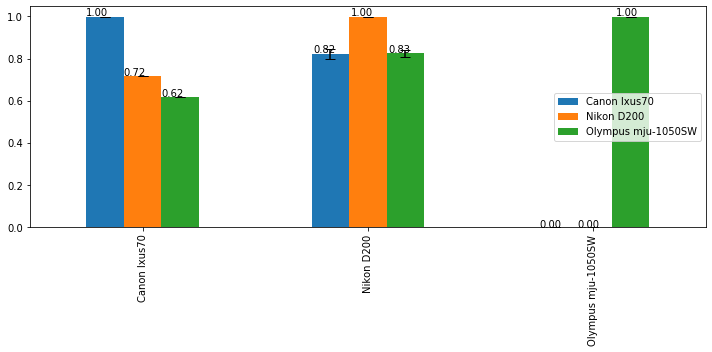

In [10]:
df_mean, df_error = func.mean_error(conf, pred_labels, real_labels,
                                    real_model=model_list, pred_model=model_list)

ax = df_mean.plot.bar(yerr=df_error, capsize=5, figsize=(10, 5))
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() * 1.008, p.get_height() * 1.008))
tikzplotlib.save("test_conf.tex")
plt.tight_layout()